




# PLANT RECOMENDATION MODEL FOR URBAN PEOPLE
Reading the data set and importing the following packages:
label encoder is used for encoding the string values into integer
tree has decisiontree() classifier
ultimately the dataset is displayed which has the following parameters
i)Name(category of plant i.e Fruit,Flower,Herb,Vegetable)
ii)Season(most suitable season for that plant)
iii)MinTemp(minimum temperature of the locality)
iv)MaxTemp(maximum temperature of the locality)
v)MinHumid(minimum humidity of the locality)
vi)MaxHumid(maximum humidity of the locality)

In [3]:
#Decision Tree Model
import pandas as pd
from sklearn import tree
model=tree.DecisionTreeClassifier()
df=pd.read_csv(r"projdataset\MergedDataset.csv")
# df=pd.read_csv(r"C:\Users\Imran\OneDrive\Desktop\nxtwave\mergeds.csv")
print(df)


           Name  Season  MinTemp  MaxTemp  Minhumid  Maxhumid         Soil
0        Flower  spring       23       30        50        60        brown
1        Flower  summer       15       23        50        70        black
2        Flower  summer        7       10        40        60  light black
3        Flower  winter        7       10        60        70        black
4        Flower  winter       10       20        65        85        black
...         ...     ...      ...      ...       ...       ...          ...
1303  Vegetable   rainy       15       30        70        90        black
1304  Vegetable   rainy       15       30        70        90        black
1305  Vegetable   rainy       15       30        70        90        black
1306  Vegetable  winter       10       13        60        70  light brown
1307  Vegetable  winter       10       13        60        70  light brown

[1308 rows x 7 columns]


In [4]:
df.describe()

,MinTemp,MaxTemp,Minhumid,Maxhumid
count,1308.000000,1308.000000,1308.000000,1308.000000
mean,16.703364,29.325688,62.844037,76.237003
std,8.852826,10.080444,20.296430,16.730926
min,-34.000000,-20.000000,5.000000,8.000000
25%,12.000000,24.000000,50.000000,65.000000
50%,18.000000,30.000000,60.000000,77.000000
75%,21.000000,35.000000,80.000000,90.000000
max,54.000000,80.000000,98.000000,100.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
le_Season=LabelEncoder()
le_Soil=LabelEncoder()
le_Name=LabelEncoder()
df["Season_n"]=le_Season.fit_transform(df["Season"])
df["Name_n"]=le_Name.fit_transform(df["Name"])
df["Soil_n"]=le_Soil.fit_transform(df["Soil"])
inputs=df.drop(["Name_n","Name","Season","Soil"],axis="columns")
target=df["Name_n"]
print(inputs)

      MinTemp  MaxTemp  Minhumid  Maxhumid  Season_n  Soil_n
0          23       30        50        60         5       2
1          15       23        50        70         6       0
2           7       10        40        60         6       5
3           7       10        60        70         7       0
4          10       20        65        85         7       0
...       ...      ...       ...       ...       ...     ...
1303       15       30        70        90         4       0
1304       15       30        70        90         4       0
1305       15       30        70        90         4       0
1306       10       13        60        70         7       6
1307       10       13        60        70         7       6

[1308 rows x 6 columns]


In [6]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1303    3
1304    3
1305    3
1306    3
1307    3
Name: Name_n, Length: 1308, dtype: int32


In [7]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=10)
model

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [8]:
from sklearn.model_selection import train_test_split
inputs_train,inputs_test,target_train,target_test=train_test_split(inputs,target,test_size=0.2)
model.fit(inputs_train,target_train)
#
inputs_test

,MinTemp,MaxTemp,Minhumid,Maxhumid,Season_n,Soil_n
1173,15,40,50,63,6,1
623,10,20,44,76,2,0
644,15,30,70,90,4,0
567,15,30,70,90,6,0
928,21,24,85,90,7,14
...,...,...,...,...,...,...
404,15,25,50,65,0,0
79,24,26,55,65,6,15
565,15,30,70,90,6,0
370,18,21,50,66,6,0


In [9]:
MinTemp=int(input("Enter minimum temperature :"))
MaxTemp=int(input("Enter maximum temperature :"))
MinHumid=int(input("Enter minimum humidity :"))
MaxHumid=int(input("Enter maximum humid-ity :"))


Enter minimum temperature :23
Enter maximum temperature :25
Enter minimum humidity :68
Enter maximum humid-ity :70


In [10]:
Season=input("Enter the season:")
Season=Season.lower()
s=0


s1=[0,1,2,3,4,5,6,7]
s2=["autumn","common","fall","monsoon","rainy","spring","summer","winter"]
dict_seas=dict(zip(s1,s2))

for k,v in dict_seas.items():
    if v==Season:
        s=k
    else:
        s=8



Enter the season:summer


In [11]:
Soil=input("Enter the soil:")
Soil=Soil.lower()
st=0
l1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
l2=["black","blue","brown","dark black","dark brown","light black","light brown","light grey","light red","light yellow","loamy"
   ,"red","reddish","reddish brown","sandy","yellow"]
if Soil in l2:
    st=l1.index(l2.index(Soil))
    print(st)
else:
    st=16


Enter the soil:black
0


In [12]:
def pred():
    k=model.predict([[MinTemp,MaxTemp,MinHumid,MaxHumid,s,st]])
    k1=[0,1,2,3]
    k2=["Flower","Fruit","Herb","Vegetable"]
    if k in k1:
        print(k2[k1.index(k)])
    else:
        print("Enter Valid Inputs")
if Season=="summer" and MinTemp<=15 and MaxTemp>=60:
    print("enter valid inputs")
elif Season=="winter"and MinTemp<=-25 and MaxTemp>=30:
    print("enter valid inputs")
else:
    pred()

Herb


In [15]:
dt_train_ac=model.score(inputs_train,target_train)
dt_test_ac=model.score(inputs_test,target_test)

In [19]:
from sklearn import metrics
preds=model.predict(inputs_test)
accuracy = metrics.accuracy_score(target_test, preds)
accuracy 

0.9694656488549618

In [20]:

print("Testing Accuracy is {}".format(dt_test_ac))
print("Training Accuracy is {}".format(dt_train_ac))

Testing Accuracy is 0.9694656488549618
Training Accuracy is 0.994263862332696


In [15]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(target_train,target_test))
# print(classification_report(target_train,target_test))
import pandas as pd
target_predict=model.predict(inputs_test)
pd.crosstab(target_test,target_predict)

col_0,0,1,2,3
Name_n,,,,
0,43,2,2,4
1,2,69,2,0
2,0,0,39,0
3,2,4,3,90


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_predict=model.predict(inputs_test)
dt_accuracy=accuracy_score(target_test,y_predict)
print(dt_accuracy)

0.9198473282442748


In [17]:
from sklearn.metrics import classification_report
print(classification_report(target_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.92      0.95      0.93        73
           2       0.85      1.00      0.92        39
           3       0.96      0.91      0.93        99

    accuracy                           0.92       262
   macro avg       0.91      0.92      0.92       262
weighted avg       0.92      0.92      0.92       262



In [1]:
while(1):
    print("Do you wish to continue: yes/no")
    y=input()
    y=y.lower()
    if y=="yes":
        import pandas as pd
        from IPython.display import display
        #Recomendation using name of the plant and displaying required conditions to grow that plant.
        def recomendation_using_name(name,dataset):
            name=name[0].upper()+name[1:].lower()
            for i in range(len(dataset)):
                if name==dataset.Name[i]:
                    dict = {'Name' : [name],
                    'Minimum Temperature' : [dataset.MinTemp[i]],
                    'Maximum Temperature' : [dataset.MaxTemp[i]],
                    'Minimum Humidity'    : [dataset.Minhumid[i]],
                    'Maximum Humidity'    : [dataset.Maxhumid[i]],
                    'Season'              : [dataset.Season[i]],
                    'Soil'                : [dataset.Soil[i]]
                       }
                    df = pd.DataFrame(dict)
                    display(df)
                    break
            else:
                print("Try another plant 😊👍")

        #Recomendation using season and displaying all the possible growing plants in that particular season. 
        def plant_recomendation_using_S(season,dataset):
            lis=[]
            print("Choose one of the following plants to opt in:")
            for i in range(len(dataset)):
                if season==dataset.Season[i]:
                    lis.append(dataset.Name[i])
                    
                    
            
            if len(lis)==0:
                print("Invalid entry")
                    
            else:
                lis=list(set(lis))
                for i in lis:
                    dict = {'Season' : [[i]]}
                    d=pd.DataFrame(dict)
                
                    display(i)

        #Classification Function using label,temperature,humidity,soil parameters and concluding with yes or no.
        def plant_classification_using_LTHS(name,Temperature,Humidity,soil,dataset):
            Label=name
            Res=[]
            print(Label)
            for i in range(len(dataset)):
                if(Label in dataset.Name[i]):
                    Res.append("Y")
                    if Temperature>=int(dataset.MinTemp[i]) and Temperature<=int(dataset.MaxTemp[i]):
                        Res.append("Y")
                        if  Humidity>=int(dataset.Minhumid[i]) and Humidity<=int(dataset.Maxhumid[i]):
                            Res.append("Y")
                            if(soil==dataset.Soil[i]):
                                Res.append("Y")
            #if any of the above cases fail then it will append "N"                           
            else:
                Res.append("N")
            #conditional based classification
            if(Res.count("Y")>=4):
                print("Yes you can this {}.The temperature {}^c and humidity {}% are in the range.".format(Label,Temperature,Humidity))

            else: 
                print("No choose some other plant,the conditions you inputs are not the best to opt this {} plant.".format(Label))


        #Recomendation using Temperature and Humidity which is area specific plant recomendation
        def plant_recomendation_using_TH(Temperature,Humidity,dataset):
            for i in range(len(dataset)):
                if Temperature>=dataset.MinTemp[i] and Temperature<=dataset.MaxTemp[i]:
                    if Humidity>=dataset.Minhumid[i] and Humidity<=dataset.Maxhumid[i]:
                        print("plant :{}\t\t\t soil :{}".format(dataset.Name[i],dataset.Soil[i]))



        #classifying inputs based on user choice to call the respective functions for classification
        def option_fun(c):
            if str(c)=="1":
                name=input("Enter Name of the plant:")
                recomendation_using_name(name,dataset)
            elif str(c)=="2":
                season=input("Enter Name of the season: ")
                season=season.lower()
                plant_recomendation_using_S(season,dataset)
            elif str(c)=="3":
                name=input("Enter the Plant Name: ")
                Temperature=int(input("Enter the Average Temperature of your locality: "))
                Humidity=int(input("Enter the Average Humidity of your locality: "))
                soil=input("Enter the soil type do you check in: ")
                soil=soil.lower()#case conversion of the soil to ease of searching in dataset.
                name=name[0].upper()+name[1::].lower()#string manipulation in accordance with name of dataset
                #plant_classification function calling using following parameters
                plant_classification_using_LTHS(name,Temperature,Humidity,soil,dataset)
            elif str(c)=="4":
                Temperature=int(input("Enter the temperature of your locality: "))
                Humidity=int(input("Enter the humidity of your locality: "))
                plant_recomendation_using_TH(Temperature,Humidity,dataset)

            else:
                print("Enter a valid entry")

                
        #asking for plant category like fruit,vegetable,herb,flower      
        n=input("Type of plant:")
        n=n.lower() 
        #explaining the user about which type of classification are behind the options 1,2,3,4.
        print("1:Recomendation using name and output is required conditions for that plant")
        print("2:Recomendation using season and output is ideal plants for that season")
        print("3:classification using name,temperature,humidity,soil and output is either yes or no")
        print("4:Recomendation using Temperature and Humidity,name and soil are outputs")
        c=input("choose one of the options (1/2/3/4): ")
        
        
        #conditonal based dataset training
        if n=="herb":
            dataset=pd.read_csv(r"projdataset\HerbsDataset.csv")
            option_fun(c)
        elif n=="vegetable":
            dataset=pd.read_csv(r"projdataset\VegetablesDataset.csv")
            option_fun(c)
        elif n=="fruit":
            dataset=pd.read_csv(r"projdataset\FruitsDataset.csv")
            option_fun(c)
        elif n=="flower":
            dataset=pd.read_csv(r"projdataset\Flowersdataset.csv")
            option_fun(c)
        else:
            print("valid type of plant")
    else:
        print("Thank You for your time❤️")
        break



Do you wish to continue: yes/no
yes
Type of plant:fruit
1:Recomendation using name and output is required conditions for that plant
2:Recomendation using season and output is ideal plants for that season
3:classification using name,temperature,humidity,soil and output is either yes or no
4:Recomendation using Temperature and Humidity,name and soil are outputs
choose one of the options (1/2/3/4): 4
Enter the temperature of your locality: 23
Enter the humidity of your locality: 80
plant : black  			 soil : black  
plant : black  			 soil : black  
plant : brown  			 soil : brown  
plant :dark brown			 soil :dark brown
plant : black  			 soil : black  
plant : brown  			 soil : brown  
plant : brown  			 soil : brown  
plant : sandy  			 soil : sandy  
plant :  red   			 soil :  red   
plant :  red   			 soil :  red   
plant : brown  			 soil : brown  
plant : brown  			 soil : brown  
plant : sandy  			 soil : sandy  
plant : sandy  			 soil : sandy  
plant : sandy  			 soil : sandy  
pl

In [16]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
df=pd.read_csv(r"projdataset\MergedDataset.csv")
X, y = make_classification(n_samples=len(df), n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

(1308, 20) (1308,)


In [17]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=0))
boostmodel=Adaboost.fit(inputs_train,target_train)



In [18]:
boostmodel_train_ac=boostmodel.score(inputs_train,target_train)
y_pred=boostmodel.predict(inputs_test)
boostmodel_test_ac=accuracy_score(target_test,y_pred)

In [19]:
print("Boost MOdel training accuracy is {}".format(boostmodel_train_ac))
print("Boost Model testing accuracy is {}".format(boostmodel_test_ac))

Boost MOdel training accuracy is 0.9933078393881453
Boost Model testing accuracy is 0.9809160305343512


In [20]:
from sklearn.metrics import classification_report
print(classification_report(target_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.97      0.97      0.97        66
           2       1.00      0.97      0.99        38
           3       0.99      0.98      0.99       108

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



In [21]:
import pandas as pd
target_predict=model.predict(inputs_test)
pd.crosstab(target_test,target_predict)

col_0,0,1,2,3
Name_n,,,,
0,48,0,0,2
1,0,66,0,0
2,0,0,37,1
3,0,0,2,106


In [22]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_scorex
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# define dataset
df=pd.read_csv(r"C:\Users\Imran\OneDrive\Desktop\MAINPROJECT\Project001\projdataset\MergedDataset.csv")
X, y = make_classification(n_samples=len(df), n_features=15,n_redundant=10, random_state=3)
# define the model|
bagmodel = BaggingClassifier(DecisionTreeClassifier(criterion="entropy",random_state=3))
bagmodel.fit(inputs_train,target_train)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=3)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



In [23]:
bagmodel_train_ac=bagmodel.score(inputs_train,target_train)
y_pred=bagmodel.predict(inputs_test)
bagmodel_test_ac=bagmodel.score(inputs_test,target_test)


In [24]:
print("Bagging training accuracy is {}".format(bagmodel_train_ac))
print("Bagging testing accuracy is {}".format(bagmodel_test_ac))

Bagging training accuracy is 0.9913957934990439
Bagging testing accuracy is 0.9732824427480916


In [25]:
import pandas as pd
target_predict=model.predict(inputs_test)
pd.crosstab(target_test,target_predict)

col_0,0,1,2,3
Name_n,,,,
0,48,0,0,2
1,0,66,0,0
2,0,0,37,1
3,0,0,2,106


In [26]:
from sklearn.metrics import classification_report
print(classification_report(target_test,target_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       1.00      1.00      1.00        66
           2       0.95      0.97      0.96        38
           3       0.97      0.98      0.98       108

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



# RANDOM FOREST

In [2]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
le_Season=LabelEncoder()
le_Soil=LabelEncoder()
le_Name=LabelEncoder()
df["Season_n"]=le_Season.fit_transform(df["Season"])
df["Name_n"]=le_Name.fit_transform(df["Name"])
df["Soil_n"]=le_Soil.fit_transform(df["Soil"])
X=df.drop(["Name_n","Name","Season","Soil"],axis="columns")
y=df["Name_n"]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test

NameError: name 'LabelEncoder' is not defined

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred1=clf.predict(X_test)



In [34]:
randomforest_train_ac=clf.score(X_train,y_train)
randomforest_test_ac=clf.score(X_test,y_test)

In [35]:
print("Random Forest Training accuracy is {}".format(randomforest_train_ac))
print("Random Forest Testing accuracy is {}".format(randomforest_test_ac))

Random Forest Training accuracy is 0.994263862332696
Random Forest Testing accuracy is 0.9389312977099237


In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
rf_ac=model.score(X_test,y_pred1)


Accuracy: 0.9809160305343512


In [32]:
import pandas as pd
target_predict=model.predict(X_test)
pd.crosstab(y_pred1,target_predict)

col_0,0,1,2,3
row_0,,,,
0,45,0,0,0
1,2,63,0,0
2,0,0,42,0
3,0,0,3,107


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.98        63
           2       0.98      0.95      0.96        43
           3       0.98      0.99      0.99       109

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



# KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
 
irisData = load_iris()
df=pd.read_csv(r"C:\Users\Imran\OneDrive\Desktop\MAINPROJECT\Project001\projdataset\MergedDataset.csv")
le_Season=LabelEncoder()
le_Soil=LabelEncoder()
le_Name=LabelEncoder()
df["Season_n"]=le_Season.fit_transform(df["Season"])
df["Name_n"]=le_Name.fit_transform(df["Name"])
df["Soil_n"]=le_Soil.fit_transform(df["Soil"])

X=df.drop(["Name_n","Name","Season","Soil"],axis="columns")
target=df["Name_n"]
# Create feature and target arrays

y=target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# # # Generate plot
# plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
# plt.legend()
# plt.xlabel('n_neighbors')
# plt.ylabel('Accuracy')



In [37]:
y_pred2=knn.predict(X_test)

knn_test_ac=knn.score(X_test,y_test)
knn_train_ac=knn.score(X_train,y_train)

In [38]:
print("KNN training accuracy is {}".format(knn_train_ac))
print("KNN testing accuracy is {}".format(knn_test_ac))

KNN training accuracy is 0.847036328871893
KNN testing accuracy is 0.816793893129771


In [37]:
pd.crosstab(y_test,y_pred2)

col_0,0,1,2,3
Name_n,,,,
0,35,1,7,2
1,6,62,2,8
2,1,0,40,0
3,2,7,12,77


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        45
           1       0.89      0.79      0.84        78
           2       0.66      0.98      0.78        41
           3       0.89      0.79      0.83        98

    accuracy                           0.82       262
   macro avg       0.81      0.83      0.81       262
weighted avg       0.83      0.82      0.82       262



# SVM


In [39]:
from sklearn import svm
from sklearn.model_selection import train_test_split
f=pd.read_csv(r"C:\Users\Imran\OneDrive\Desktop\MAINPROJECT\Project001\projdataset\MergedDataset.csv")
le_Season=LabelEncoder()
le_Soil=LabelEncoder()
le_Name=LabelEncoder()
f["Season_n"]=le_Season.fit_transform(f["Season"])
f["Name_n"]=le_Name.fit_transform(f["Name"])
f["Soil_n"]=le_Soil.fit_transform(f["Soil"])

a=f.drop(["Name_n","Name","Season","Soil"],axis="columns")
b=f["Name_n"]
# Split dataset into training set and test set
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2,random_state=10) # 70% training and 30% test
#Create a svm Classifier
clf1 = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf1.fit(a_train, b_train)



SVC()

In [40]:
svm_test_ac=clf1.score(a_test,b_test)
svm_train_ac=clf1.score(a_train,b_train)
svm_test_ac

0.4770992366412214

In [41]:
y_pred3=clf1.predict(a_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(b_test,y_pred3))

              precision    recall  f1-score   support

           0       0.41      0.80      0.54        44
           1       0.56      0.11      0.19        80
           2       1.00      0.02      0.05        43
           3       0.50      0.84      0.63        95

    accuracy                           0.48       262
   macro avg       0.62      0.44      0.35       262
weighted avg       0.59      0.48      0.38       262



In [43]:
pd.crosstab(b_test,y_pred3)

col_0,0,1,2,3
Name_n,,,,
0,35,2,0,7
1,15,9,0,56
2,22,3,1,17
3,13,2,0,80


In [44]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Decision Tree', model), ('Random Forest', clf)], 
                       voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(X_test,y_test))
ensemble_test_ac=ensemble.score(X_test,y_test)
ensemble_train_ac=ensemble.score(X_train,y_train)

The accuracy for DecisionTree and Random Forest is: 0.9694656488549618


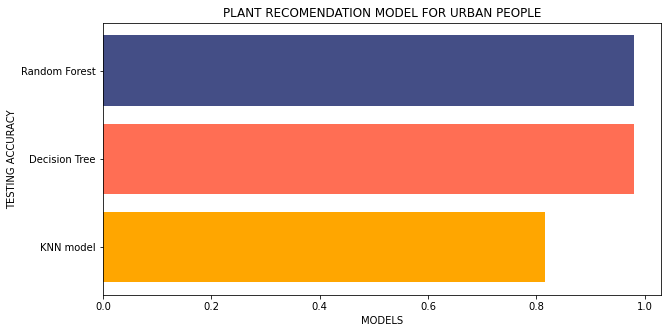

In [45]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {"KNN model":knn_test_ac,'Decision Tree':dt_test_ac,'Random Forest':randomforest_test_ac}#'SVM':svm_test_ac}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# plt.bar(courses, values, color ='green',width = 0.4)
plt.barh(courses,values,color = ['#ffa600','#ff6e54','#444e86']) 
 
plt.xlabel("MODELS")
plt.ylabel("TESTING ACCURACY")
plt.title("PLANT RECOMENDATION MODEL FOR URBAN PEOPLE")
plt.show()

Text(0, 0.5, 'Accuracy')

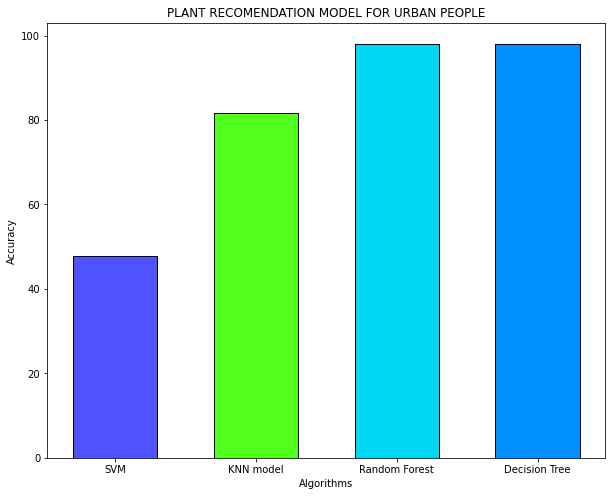

In [79]:
data = {"SVM":svm_test_ac*100,"KNN model":knn_test_ac*100,'Random Forest':randomforest_test_ac*100,'Decision Tree':dt_test_ac*100}

#data = {"SVM":svm_test_ac*100,"KNN model":knn_test_ac*100,'Random Forest':randomforest_test_ac*100,#'ensemble':ensemble_test_ac*100,'Decision Tree':dt_test_ac*100,'boostmodel':boostmodel_test_ac*100}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))
plt.bar(courses, values, color = ['#4f53ff','#50ff1e','#00d8f3','#0091ff','#00baff','#00f096'],width = 0.6,edgecolor='black')
plt.title("PLANT RECOMENDATION MODEL FOR URBAN PEOPLE")
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
#plt.grid(color = 'black', alpha = 5, linestyle = '-', linewidth = 1)

Seasons represented in pie chart

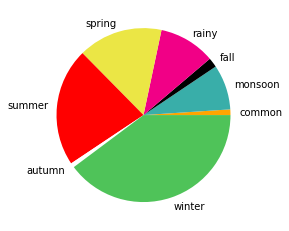

In [47]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([1,8,1.7,10,15,21,0.8,38])
mylabels = ["common","monsoon","fall","rainy","spring","summer","autumn","winter"]

colors = ( "orange", "#39AEA9", "black","#F10086", "#EBE645", "red","white","#4fc359")
plt.pie(y, colors=colors,labels = mylabels)
# plt.legend(title="Seasons:")
plt.show()

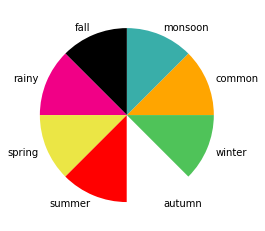

In [48]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5])
mylabels = ["common","monsoon","fall","rainy","spring","summer","autumn","winter"]

colors = ( "orange", "#39AEA9", "black","#F10086", "#EBE645", "red","white","#4fc359")
plt.pie(y, colors=colors,labels = mylabels)
# plt.legend(title="Seasons:")
plt.show()

soils types represented in pie chart

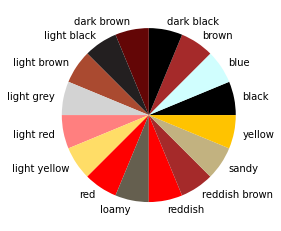

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# y = np.array([39.6,0.001,21.8,0.3,0.3,4.4,10.3,0.1,0.4,0.12,0.16,0.88,0.06,0.06,0.53,0.04])
y=np.array([6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5])
mylabels = ["black","blue","brown","dark black","dark brown","light black","light brown","light grey","light red","light yellow","red"
   ,"loamy","reddish","reddish brown","sandy","yellow"]
colors = ( "#000000", "#d0fefe", "brown","#000", "#630606","#231F20","#AA4A30","#D3D3D3","#ff7f7f","#FFDD67","red","#655f4f","#FF0000","#A52A2A","#C2B280","#FFC300")
plt.pie(y,colors=colors,labels = mylabels)
# plt.legend(title="Seasons:")
plt.show()

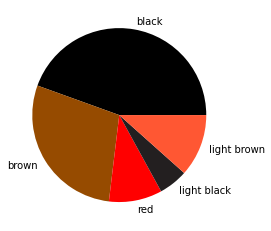

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# y = np.array([39.6,0.001,21.8,0.3,0.3,4.4,10.3,0.1,0.4,0.12,0.16,0.88,0.06,0.06,0.53,0.04])
y=np.array([44.49,28.6,9.9,5.41,11.6])
mylabels = ["black","brown","red","light black","light brown"]
colors = ( "#000000","#964b00","#ff0000","#231f20","#ff5733")
plt.pie(y,colors=colors,labels = mylabels)
# plt.legend(title="Seasons:")
plt.show()